In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing and cleaning

In [10]:
df = pd.read_csv('C:/Users/student/Downloads/insurance.csv')

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.shape # getting the rows and columns

(1338, 7)

In [13]:
df.info() #get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
#check for missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [15]:
df.describe() #statistical measures of dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


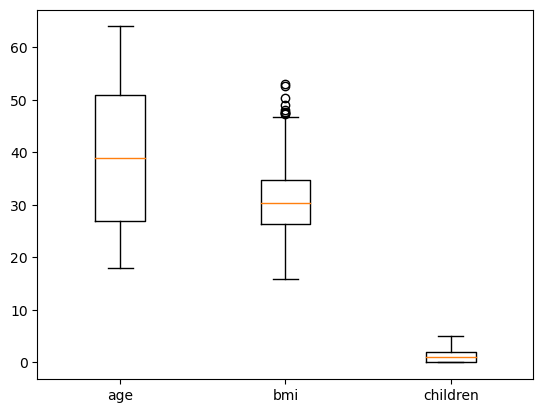

In [16]:
# box plot 

labels = ['age','bmi','children']
box = plt.boxplot([df['age'],df['bmi'],df['children']],labels = labels)
plt.show()


##### from this boxplot we can see that bmi has some outliers denoted by the circles above, we can also see how the data is there with respect to the median, 1st and 3rd quartile and we can see how it impacts our decision

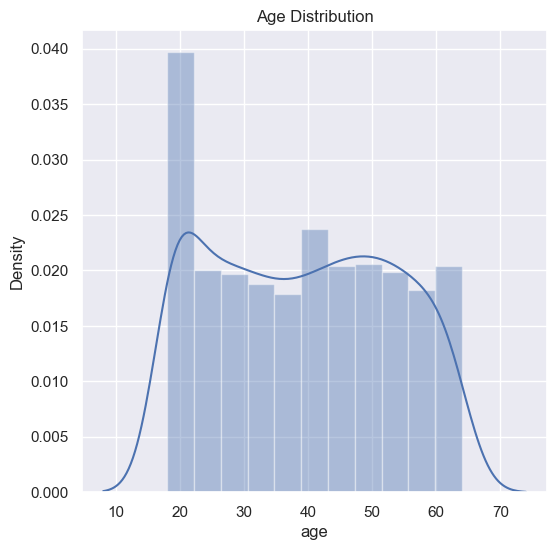

In [17]:
#distribution of age attribute

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

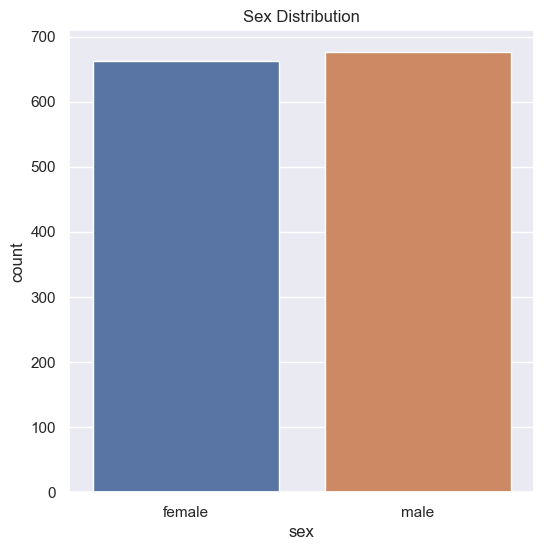

In [20]:
#gender column

plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = df)
plt.title('Sex Distribution')
plt.show()

In [21]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

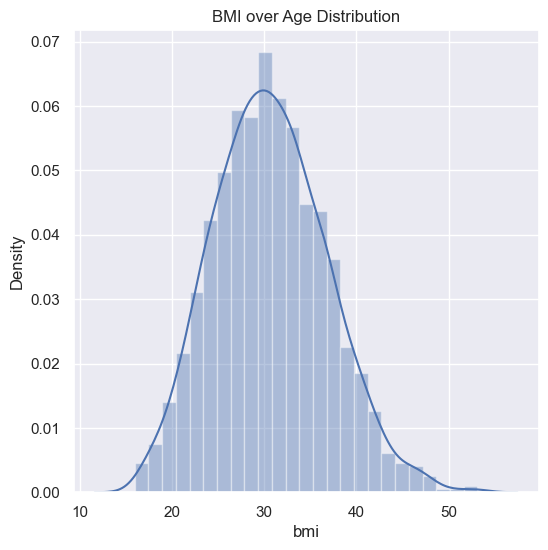

In [23]:
#BMI Distribution
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['bmi'])
plt.title('BMI over Age Distribution')
plt.show()

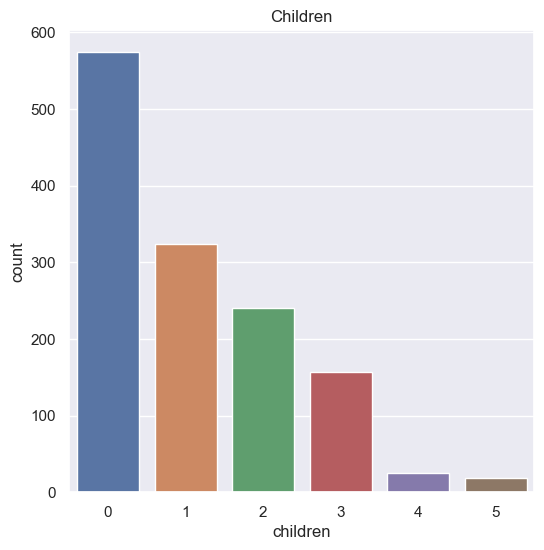

In [24]:
#children column
plt.figure(figsize = (6,6))
sns.countplot(x='children', data = df)
plt.title('Children')
plt.show()

In [25]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

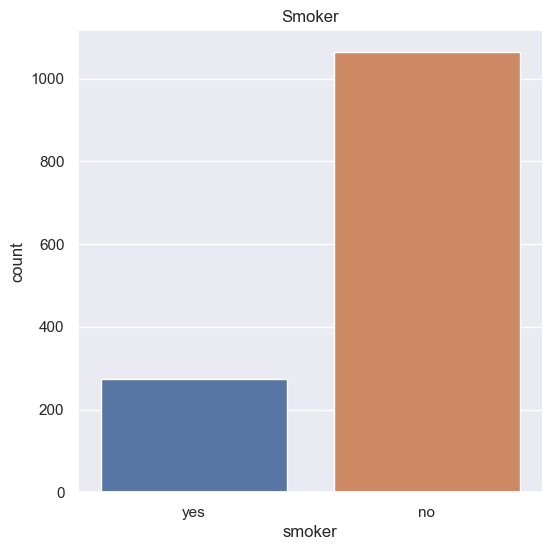

In [26]:
#smoker column
plt.figure(figsize = (6,6))
sns.countplot(x='smoker',data = df)
plt.title('Smoker')
plt.show()

In [27]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

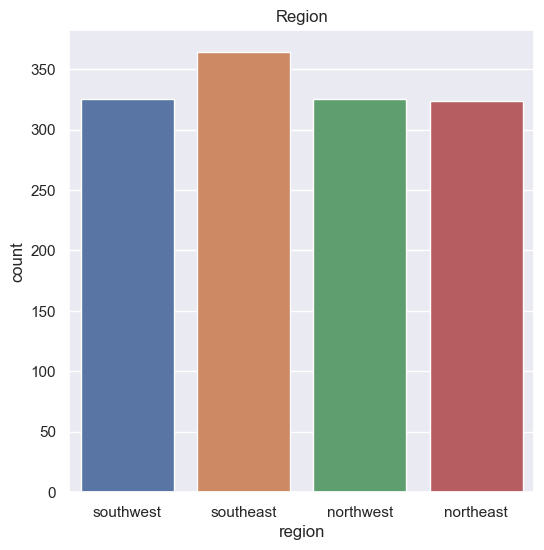

In [28]:
#region column
plt.figure(figsize = (6,6))
sns.countplot(x='region',data = df)
plt.title('Region')
plt.show()

In [30]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

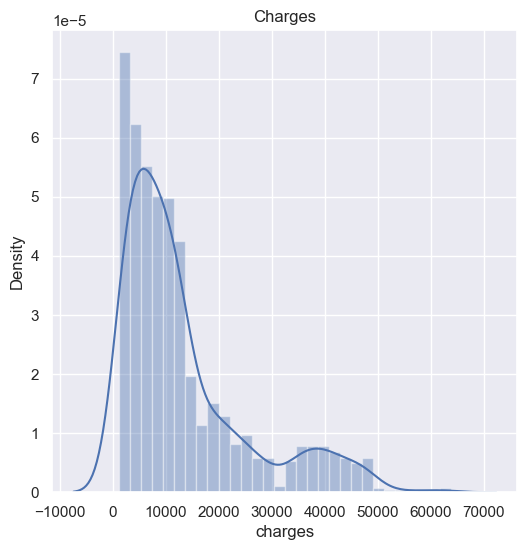

In [31]:
#charges distribution

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['charges'])
plt.title('Charges')
plt.show()

## Data Preprocessing


In [32]:
# encoding all the columns

df.replace({'sex':{'male':0,'female':1}}, inplace = True)

df.replace({'smoker':{'yes':0,'no':1}}, inplace = True)

df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace = True)

print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


## Model Building


In [33]:
X = df.drop(columns = 'charges', axis = 1)
Y = df['charges']

In [34]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [40]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1338,) (1070,) (268,)


In [41]:
#perform the regression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [46]:
#predict the accuracy on training set
training_predict = regressor.predict(X_train)

In [47]:
#r2 value

r2_train = metrics.r2_score(Y_train,training_predict)
print("R2 value", r2_train)

R2 value 0.7413131194887537


## Task 1

In [48]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005212,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.016121,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.261829,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.019257,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.053930,-0.787251
region,0.005212,0.016121,-0.261829,0.019257,0.053930,1.000000,-0.056993
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.056993,1.000000


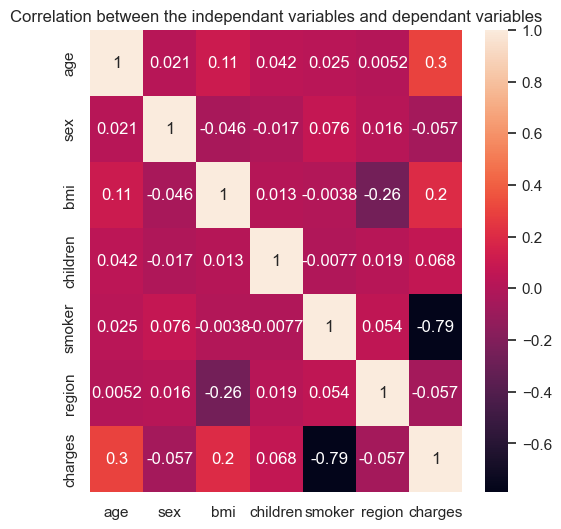

In [51]:
#plot the results
sns.set()
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between the independant variables and dependant variables')
plt.show()

######  